### Імпорт модулів

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter


### 1. Завантаження сигналів

In [16]:
file1 = 'Lb8_8_1.prn'
file2 = 'Lb8_8_2.prn'

def load_signal(filename):
    return np.loadtxt(filename)

x1 = load_signal(file1)
x2 = load_signal(file2)

### 2. Формування корисного сигналу Q_t

Text(0.5, 1.0, 'Корисний сигнал')

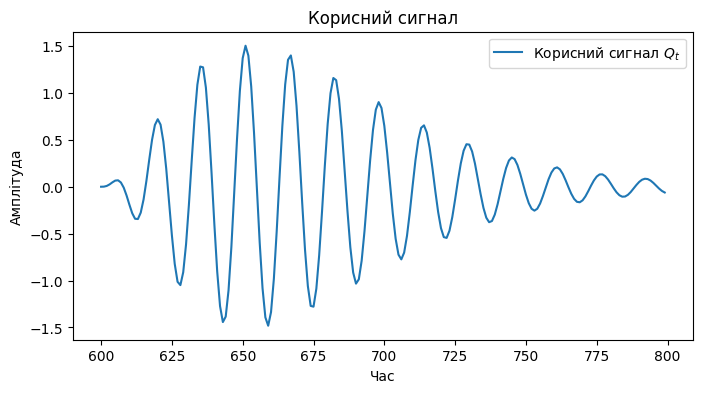

In [15]:
a = 0.003
alpha = 0.04
beta = 2.1
omega = 0.4
m = 600
L = 200
t = np.arange(m, m + L)

Q_t = a * (t - m)**beta * np.exp(-alpha * (t - m)) * np.sin(omega * (t - m))

plt.figure(figsize=(8, 4))
plt.plot(t, Q_t, label='Корисний сигнал $Q_t$')
plt.legend()
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.title('Корисний сигнал')

### 3. Обчислення імпульсної характеристики узгодженого фільтра

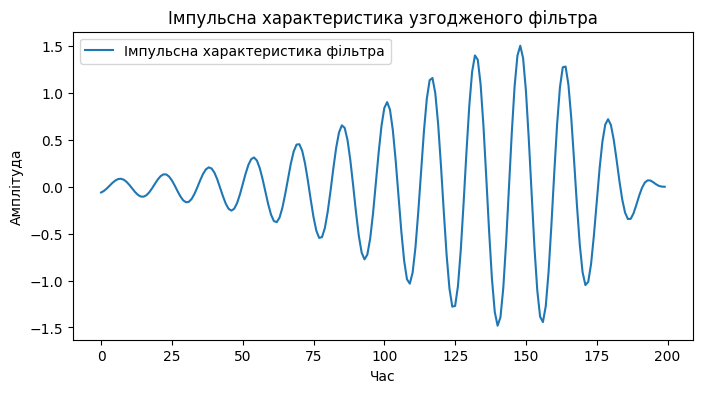

In [11]:
h = Q_t[::-1]

plt.figure(figsize=(8, 4))
plt.plot(h, label='Імпульсна характеристика фільтра')
plt.legend()
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.title('Імпульсна характеристика узгодженого фільтра')
plt.show()

### 4. Фільтрація сигналів

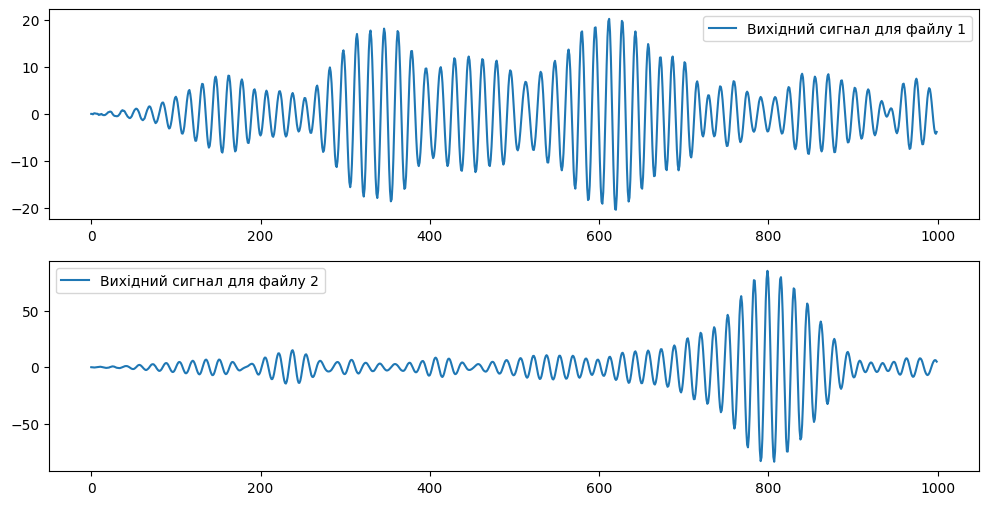

In [17]:
y1 = lfilter(h, 1, x1)
y2 = lfilter(h, 1, x2)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y1, label='Вихідний сигнал для файлу 1')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y2, label='Вихідний сигнал для файлу 2')
plt.legend()
plt.show()

### 5. Знаходження максимального відношення сигнал/завада

In [13]:
def compute_snr(y_signal):
    signal_power = max(y_signal) ** 2
    noise_power = np.var(y_signal)
    return signal_power / noise_power

snr1 = compute_snr(y1)
snr2 = compute_snr(y2)

print(f'Максимальне відношення сигнал/завада для файлу 1: {snr1:.2f}')
print(f'Максимальне відношення сигнал/завада для файлу 2: {snr2:.2f}')

Максимальне відношення сигнал/завада для файлу 1: 7.85
Максимальне відношення сигнал/завада для файлу 2: 21.56


# 6. Аналіз наявності корисного сигналу

In [14]:
threshold = 1.5
if snr1 > threshold:
    print('Корисний сигнал Q_t присутній у першому файлі')
else:
    print('Корисний сигнал Q_t відсутній у першому файлі')

if snr2 > threshold:
    print('Корисний сигнал Q_t присутній у другому файлі')
else:
    print('Корисний сигнал Q_t відсутній у другому файлі')

Корисний сигнал Q_t присутній у першому файлі
Корисний сигнал Q_t присутній у другому файлі
